# Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier

In [2]:
from extract_dataframe import read_json       
from extract_dataframe import TweetDfExtractor    
from clean_tweets_dataframe import Clean_Tweets

# Data Preprocessing

In [3]:
_, tweet_list = read_json("data/Economic_Twitter_Data.json")
tweet = TweetDfExtractor(tweet_list)
Data = tweet.get_tweet_df(True)

File Successfully Saved!


In [4]:
tweet_df = pd.read_csv('clean_processed_tweet_data.csv')

In [5]:
print(tweet_df.shape)

(16374, 15)


In [6]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16374 entries, 0 to 16373
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          16374 non-null  int64  
 1   created_at          16374 non-null  object 
 2   source              16374 non-null  object 
 3   original_text       16371 non-null  object 
 4   polarity            16374 non-null  float64
 5   subjectivity        16374 non-null  float64
 6   lang                16374 non-null  object 
 7   favorite_count      16374 non-null  int64  
 8   retweet_count       16374 non-null  int64  
 9   original_author     16374 non-null  object 
 10  followers_count     16374 non-null  int64  
 11  possibly_sensitive  6168 non-null   object 
 12  hashtags            16374 non-null  object 
 13  place               10934 non-null  object 
 14  friends_count       16374 non-null  int64  
dtypes: float64(2), int64(5), object(8)
memory usage: 1.9+

In [7]:
tweet_df.head(n=3)

,Unnamed: 0,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,followers_count,possibly_sensitive,hashtags,place,friends_count
0,38,2022-04-22 22:17:05+00:00,"<a href=""http://twitter.com/download/android"" ...",The 10-year yield is telling us that there's ...,0.16,0.540,en,12179,43,davideiacovozzi,18,NaN,"[{'text': 'gold', 'indices': [116, 121]}, {'te...",NaN,55
1,39,2022-04-22 13:44:53+00:00,"<a href=""http://twitter.com/download/android"" ...",…,0.15,0.175,en,12179,32,davideiacovozzi,18,NaN,[],{'created_at': 'Fri Apr 22 12:13:03 +0000 2022...,55
2,41,2022-04-22 06:10:34+00:00,"<a href=""http://twitter.com/download/android"" ...",//t.co/kO2FfHKaZg,0.00,0.000,en,12179,26,davideiacovozzi,18,False,[],NaN,55


In [8]:
cleanTweet = tweet_df[['original_text','polarity']]

In [11]:
def text_category (p):
  if p > 0:
    return 'positive'
  elif p < 0:
    return 'negative'
  else:
    return 'neutral'

# Data Visualisation

C:\Users\Selu\AppData\Local\Temp/ipykernel_13116/887397833.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation=90)
C:\Users\Selu\AppData\Local\Temp/ipykernel_13116/887397833.py:22: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


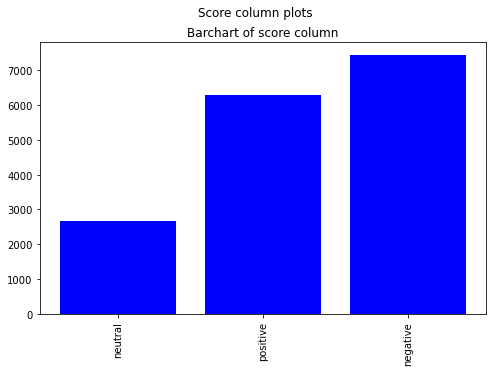

In [12]:
score = pd.Series([text_category(row_val) for row_val in cleanTweet['polarity']])
cleanTweet = pd.concat([cleanTweet, score.rename("score")], axis=1)

# Visualize The  score  column using barchart

# Create a figure for 2 subplots (1 row, 2 columns)
labels = ['neutral', 'positive', 'negative']
positive = len(cleanTweet[cleanTweet['score'] == "positive"])
negative = len(cleanTweet[cleanTweet['score'] == "negative"])
neutral = len(cleanTweet[cleanTweet['score'] == "neutral"])
fig, ax = plt.subplots(1, 1, figsize = (8,5))

# Create a bar plot of score column
ax.bar(x=labels, height=[negative, positive, neutral], color='blue')
ax.set_title('Barchart of score column')
ax.set_xticklabels(labels, rotation=90)

# Add a title to the Figure
fig.suptitle('Score column plots')

# Show the figure
fig.show()

In [13]:
cleanTweet = cleanTweet.drop(cleanTweet[cleanTweet.score == 'neutral'].index)
scoremap = pd.Series([1 if row_val == 'positive' else 0 for row_val in cleanTweet['score']])
cleanTweet['scoremap'] = scoremap

# Data Exploration

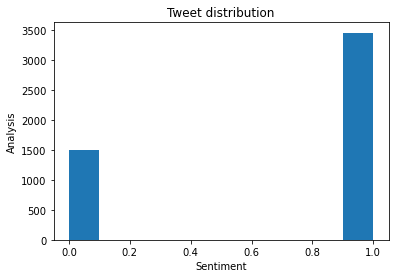

In [15]:
fig=plt.figure()
ax = fig.add_subplot(1,1,1)

#Variable
ax.hist(cleanTweet['scoremap'],bins = 10)

#Labels and Tit
plt.title('Tweet distribution')
plt.xlabel('Sentiment')
plt.ylabel('Analysis')
plt.show()